In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../data/datatran_2016-2017.csv', dtype={'br_str': str})
df.shape

/Users/leportella/.virtualenvs/data/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(180991, 32)

In [3]:
class0 = df[df.target==0].sample(10291)
class1 = df[df.target==1].sample(10291)
class2 = df[df.target==2]

df2 = shuffle(pd.concat([class0, class1, class2]))

In [4]:
dd = df2[['weekday', 'uf', 'km_int', 'accident_type', 
          'climate', 'ano', 'mes', 'dia', 'hora', 'target']]
dd = dd.dropna()

In [5]:
dd.target.value_counts()

2    10291
1    10291
0    10291
Name: target, dtype: int64

In [6]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()


parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 500]
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

/Users/leportella/.virtualenvs/data/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
y_pred = best_clf.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.5716599190283401

Confusion matrix, without normalization
[[1387  583  162]
 [ 704  906  390]
 [ 406  400 1237]]


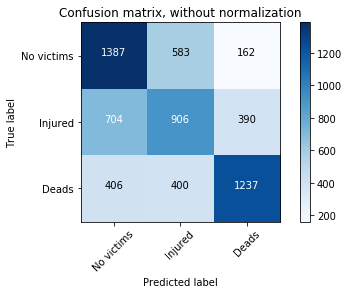

In [11]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['No victims', 'Injured', 'Deads'],
                      title='Confusion matrix, without normalization')

In [12]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.56      0.65      0.60      2132
          1       0.48      0.45      0.47      2000
          2       0.69      0.61      0.65      2043

avg / total       0.58      0.57      0.57      6175



In [13]:
importances = pd.DataFrame({'col': X_test.columns, 'importances': best_clf.feature_importances_})
importances.sort_values(by='importances', ascending=False)

,col,importances
0,km_int,0.274856
4,hora,0.085477
3,dia,0.071237
2,mes,0.041335
52,accident_type_rear collision,0.021043
50,accident_type_pedestrian trampling,0.020991
47,accident_type_frontal collision,0.020145
55,accident_type_transversal collision,0.015706
42,accident_type_carriage bed outlet,0.015580
61,climate_rain,0.014408
